In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import scipy.cluster.hierarchy as sch
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Data Mining/mall_customers.csv")

In [ ]:
### Hiển thị thông tin tổng quan về bộ dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
### Hiển thị số dòng và số cột
data.shape

(200, 5)

In [ ]:
### Hiển thị số dòng
data.shape[0]

200

In [ ]:
### Hiển thị số cột
data.shape[1]

5

In [ ]:
### Hiển thị 10 dòng đầu tiên
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
### Đổi lại tên cột cho ngắn gọn
data.rename(columns={'Annual Income (k$)':'Annual_Income', 'Spending Score (1-100)':'Spending_Score'}, inplace=True)

In [ ]:
### Hiển thị 10 dòng đầu tiên sau khi đã chỉnh sửa
data.head(10)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
### Kiểm tra dữ liệu thiếu
data.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [ ]:
### Kiểm tra dữ liệu trùng lặp
data.duplicated().sum()

0

In [ ]:
### Xoá cột dữ liệu không cần thiết
data.drop(['CustomerID'], axis = 1, inplace = True)

In [ ]:
# Hiển thị số lượng mỗi giá trị trong cột "Gender"
print(data['Gender'].value_counts())

Female    112
Male       88
Name: Gender, dtype: int64


In [ ]:
### Thống kê mô tả cho tất cả các cột số trong bộ dữ liệu

# Tính giá trị trung vị cho từng cột
median = data.median()

# Kết hợp kết quả của hàm describe() và giá trị trung vị cho từng cột
summary = pd.concat([data.describe(), median.to_frame(name='median').T])

# Hiển thị kết quả
print(summary)

               Age  Annual_Income  Spending_Score
count   200.000000     200.000000      200.000000
mean     38.850000      60.560000       50.200000
std      13.969007      26.264721       25.823522
min      18.000000      15.000000        1.000000
25%      28.750000      41.500000       34.750000
50%      36.000000      61.500000       50.000000
75%      49.000000      78.000000       73.000000
max      70.000000     137.000000       99.000000
median   36.000000      61.500000       50.000000


<ipython-input-49-a09f7b19db36>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


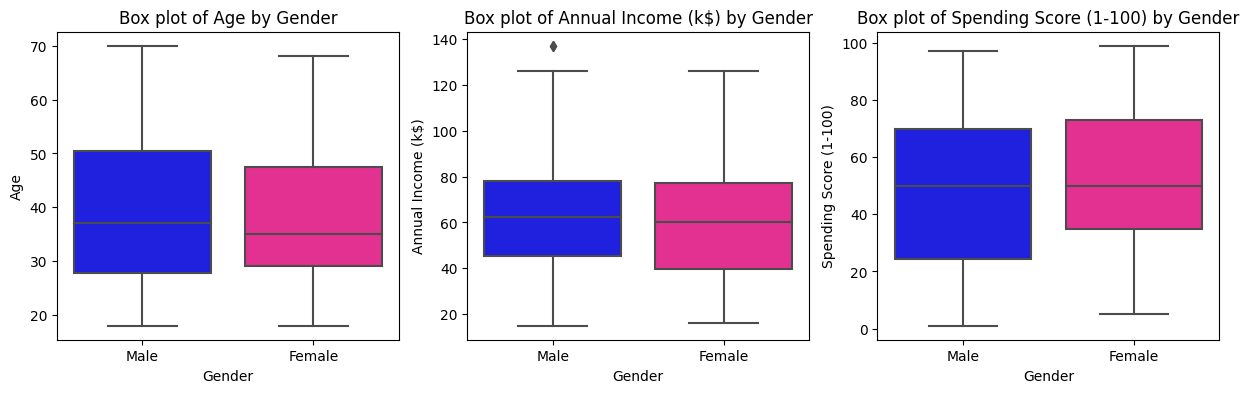

In [ ]:
palette = {'Female': '#FF1493', 'Male': '#0000FF'}
plt.figure(figsize=(15,4))

### Vẽ box plot cho "Age" theo "Gender"
plt.subplot(1,3,1)
sns.boxplot(x=data.Gender, y=data.Age, palette=palette)
plt.ylabel('Age')
plt.title('Box plot of Age by Gender')

### Vẽ box plot cho "Annual Income (k$)" theo "Gender"
plt.subplot(1,3,2)
sns.boxplot(x=data.Gender, y=data.Annual_Income, palette=palette)
plt.ylabel('Annual Income (k$)')
plt.title('Box plot of Annual Income (k$) by Gender')

### Vẽ box plot cho "Spending Score (1-100)" theo "Gender"
plt.subplot(1,3,3)
sns.boxplot(x=data.Gender, y=data.Spending_Score, palette=palette)
plt.ylabel('Spending Score (1-100)')
plt.title('Box plot of Spending Score (1-100) by Gender')

plt.show()

In [ ]:
### Tính toán IQR của cột 'Annual Income'
Q1 = data['Annual Income (k$)'].quantile(0.25)
Q3 = data['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

### Xác định giá trị giới hạn dưới và giới hạn trên cho các giá trị bình thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

### Xác định các giá trị ngoại lai trong cột 'Annual Income'
outliers = data[(data['Annual Income (k$)'] < lower_bound) | (data['Annual Income (k$)'] > upper_bound)]

### In các giá trị ngoại lai
print(outliers)

     Gender  Age  Annual_Income  Spending_Score
198       1   32            137              18
199       1   30            137              83


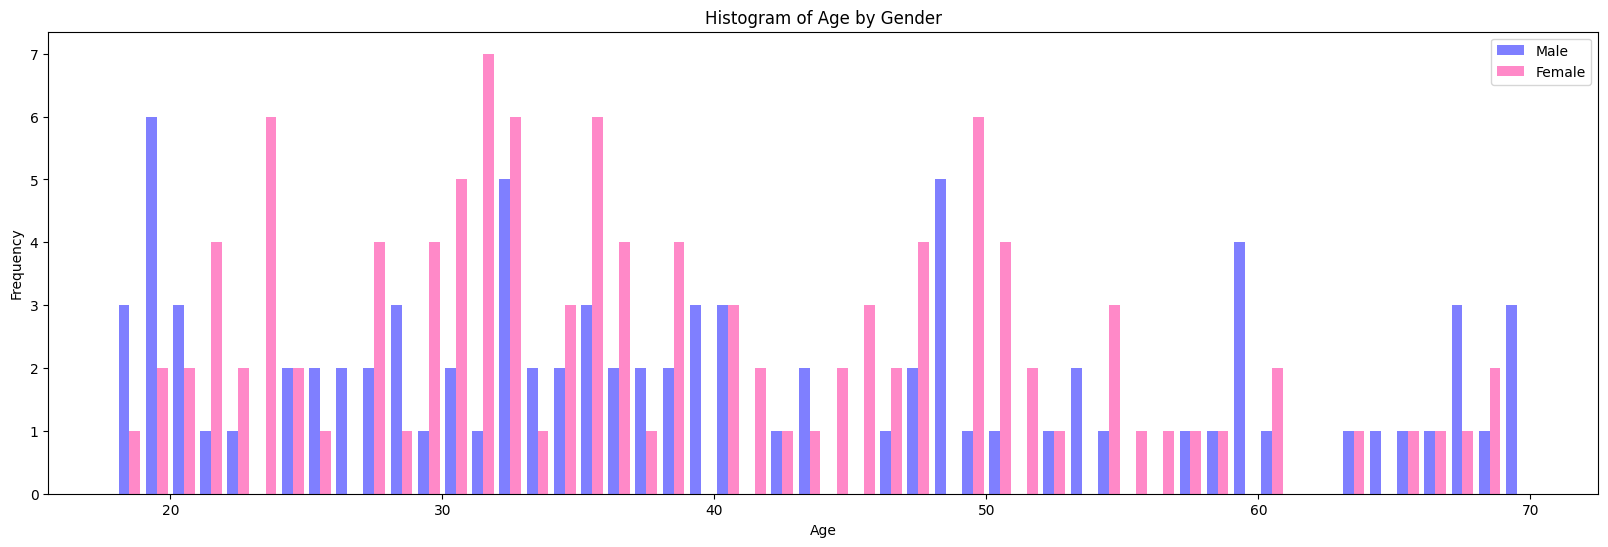

In [ ]:
# Tách dữ liệu "Age" theo "Gender"
male_data = data[data['Gender']=='Male']['Age']
female_data = data[data['Gender']=='Female']['Age']

# Tạo một hình ảnh mới với kích thước tự chọn
plt.figure(figsize=(20,6))

# Vẽ histogram cho "Age" theo Gender"
plt.hist([male_data, female_data], bins=70-18, color=['#0000FF', '#FF1493'], alpha=0.5, label=['Male', 'Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age by Gender')
plt.legend()

plt.show()

In [ ]:
### Lấy ra các dòng có Age = 20
subset = data[data['Age'] == 20]

### Đếm số lượng nam và nữ
counts = subset['Gender'].value_counts()

### In số lượng nam và nữ
print(counts)

Male      3
Female    2
Name: Gender, dtype: int64


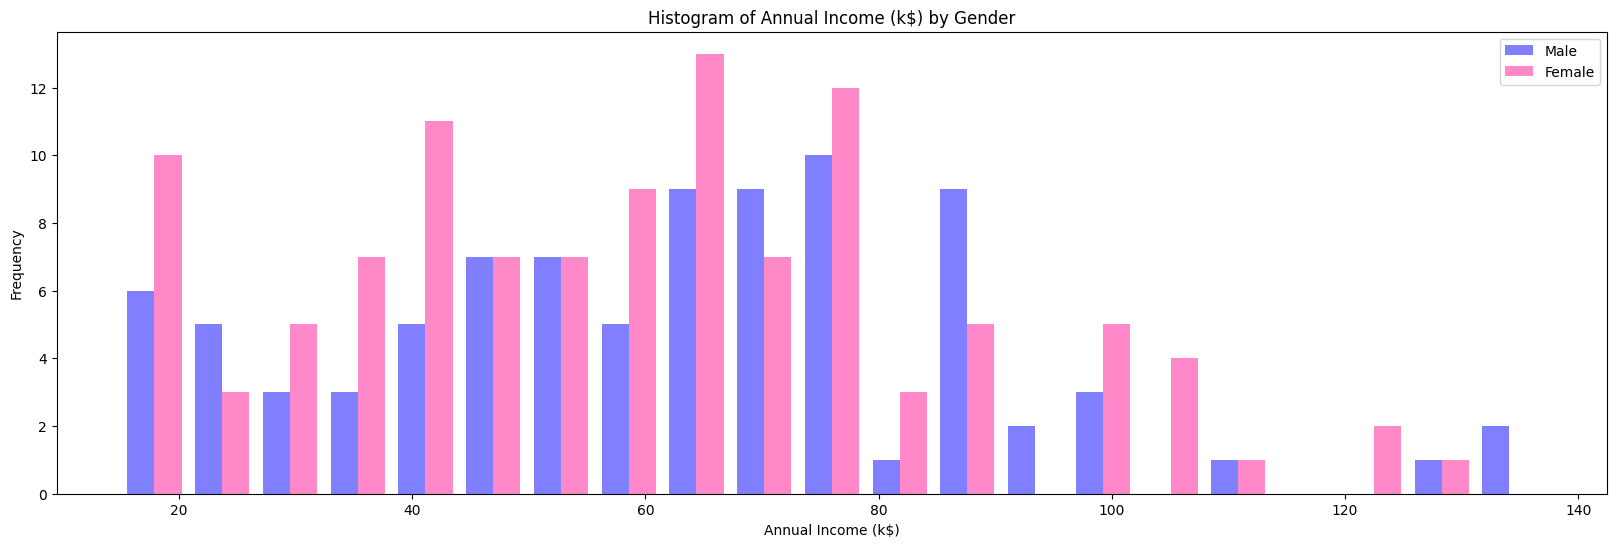

In [ ]:
### Tách dữ liệu "Annual Income (k$)" theo "Gender"
male_data = data[data['Gender']=='Male']['Annual_Income']
female_data = data[data['Gender']=='Female']['Annual_Income']

### Kết hợp dữ liệu của cả hai nhóm
combined_data = np.concatenate((male_data, female_data))

### Tạo một hình ảnh mới với kích thước tự chọn
plt.figure(figsize=(20,6))

### Vẽ histogram cho "Annual Income (k$)" theo "Gender"
plt.hist([male_data, female_data], bins=21, color=['#0000FF', '#FF1493'], alpha=0.5, label=['Male', 'Female'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Income (k$) by Gender')
plt.legend()

plt.show()

In [ ]:
### Lấy ra các dòng có Annual_Income <= 25
subset = data[data['Annual_Income'] <= 25]

### Đếm số lượng nam và nữ
counts = subset['Gender'].value_counts()

### In số lượng nam và nữ
print(counts)

Female    13
Male      11
Name: Gender, dtype: int64


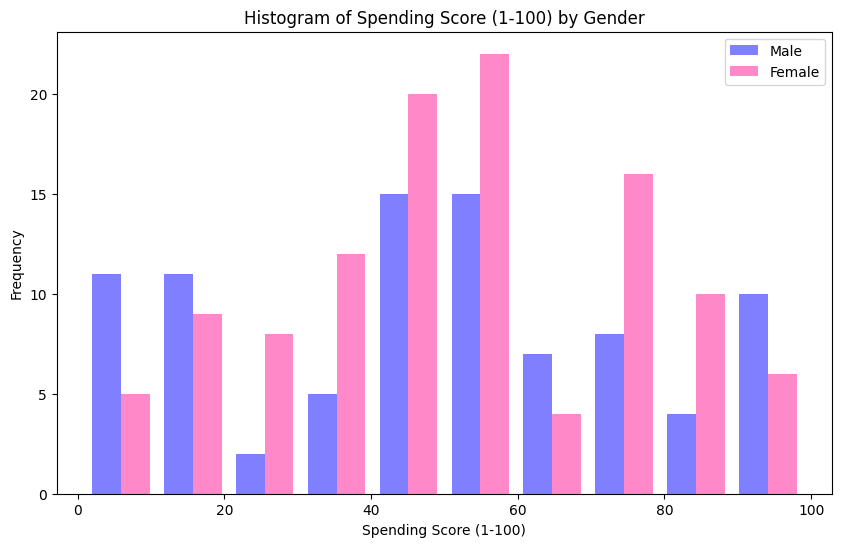

In [ ]:
### Tách dữ liệu "Spending Score (1-100)" theo "Gender"
male_data = data[data['Gender']=='Male']['Spending_Score']
female_data = data[data['Gender']=='Female']['Spending_Score']

### Tạo một hình ảnh mới với kích thước tự chọn
plt.figure(figsize=(10,6))

### Vẽ histogram cho "Spending Score (1-100)" theo "Gender"
plt.hist([male_data, female_data], bins=10, color=['#0000FF', '#FF1493'], alpha=0.5, label=['Male', 'Female'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')
plt.title('Histogram of Spending Score (1-100) by Gender')
plt.legend()

plt.show()

In [ ]:
### Lấy ra các dòng có Spending_Score <= 20
subset = data[data['Spending_Score'] <= 20]

### Đếm số lượng nam và nữ
counts = subset['Gender'].value_counts()

### In số lượng nam và nữ
print(counts)

Male      22
Female    14
Name: Gender, dtype: int64


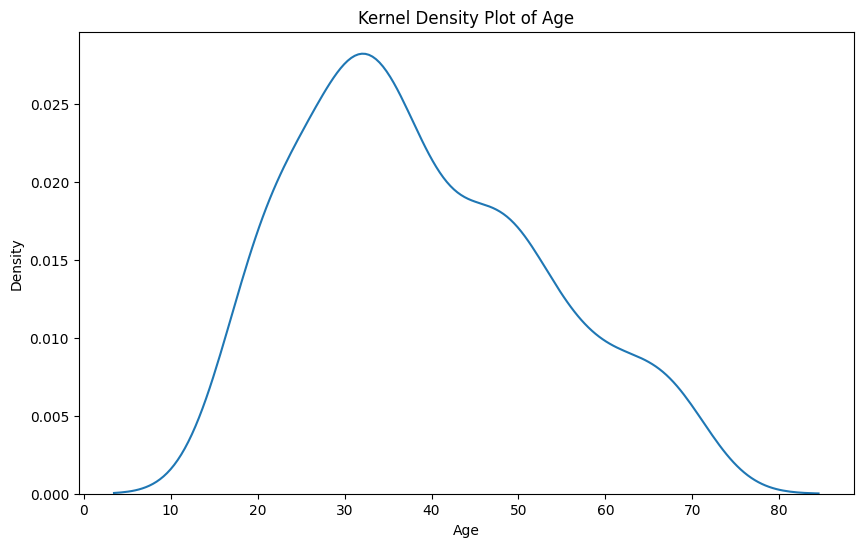

In [ ]:
# Vẽ kernel density plot cho cột "Age"
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Age')
plt.title("Kernel Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

<ipython-input-28-e5e52b21d892>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



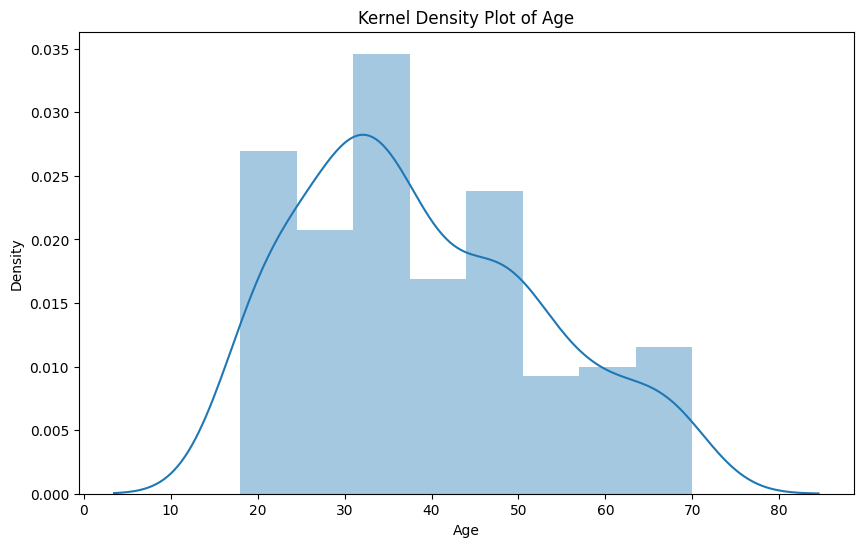

In [ ]:
# Vẽ kernel density plot, histogram cho cột "Age"
plt.figure(figsize=(10,6))
sns.distplot(data.Age)
plt.title("Kernel Density Plot of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

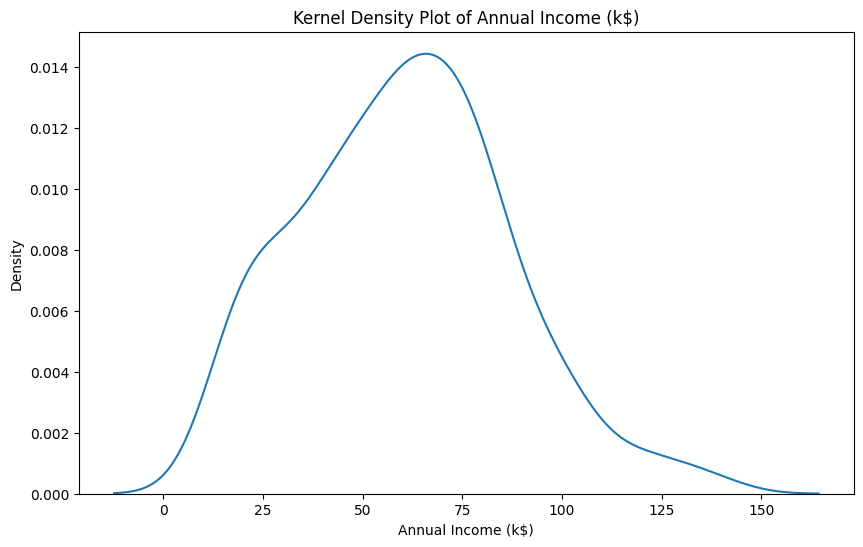

In [ ]:
# Vẽ kernel density plot cho cột "Annual Income (k$)"
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Annual_Income')
plt.title("Kernel Density Plot of Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.show()

<ipython-input-117-9d5f838b3946>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



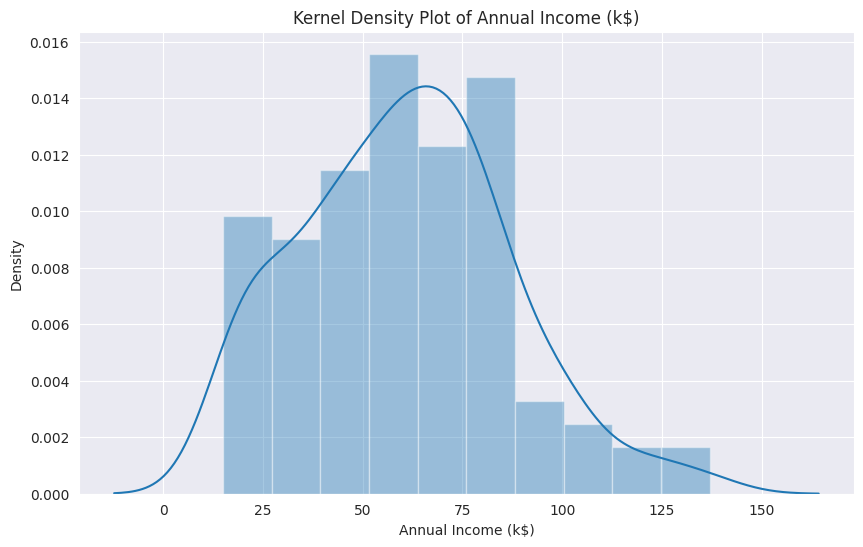

In [ ]:
# Vẽ kernel density plot, histogram cho cột "Annual Income (k$)"
plt.figure(figsize=(10,6))
sns.distplot(data.Annual Income (k$))
plt.title("Kernel Density Plot of Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")

plt.show()

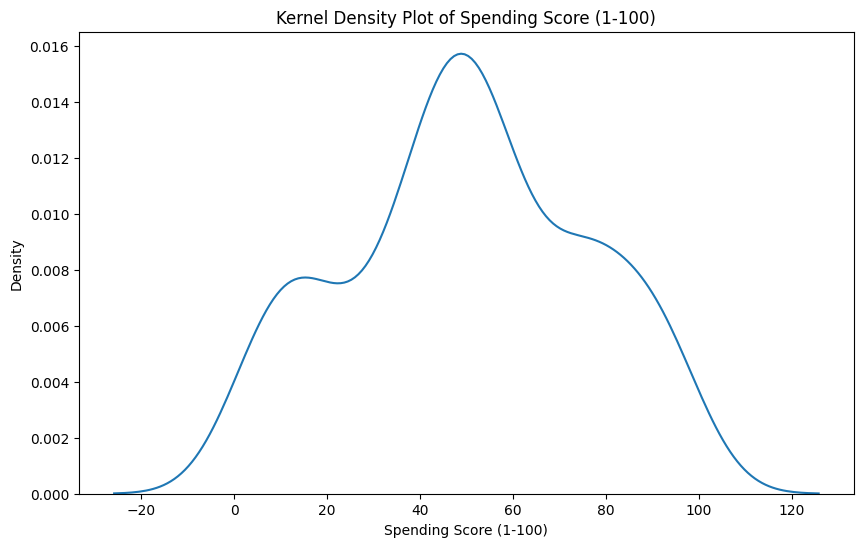

In [ ]:
# Vẽ kernel density plot cho cột "Spending Score (1-100)"
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Spending_Score')
plt.title("Kernel Density Plot of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Density")
plt.show()

<ipython-input-121-7e03e5d64717>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



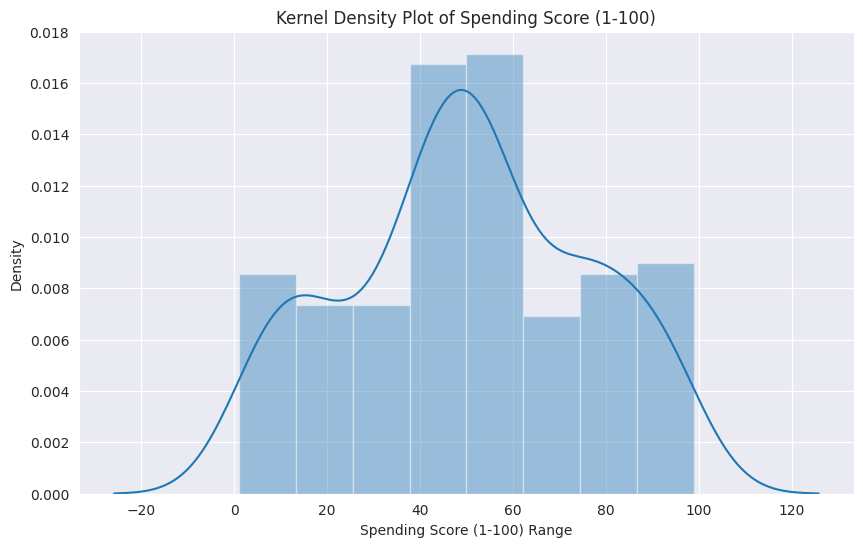

In [ ]:
# Vẽ kernel density plot, histogram cho cột "Spending Score (1-100)"
plt.figure(figsize=(10,6))
sns.distplot(data.Spending_Score)
plt.title("Kernel Density Plot of Spending Score (1-100)")
plt.xlabel("Spending Score (1-100) Range")
plt.ylabel("Density")

plt.show()

<Axes: >

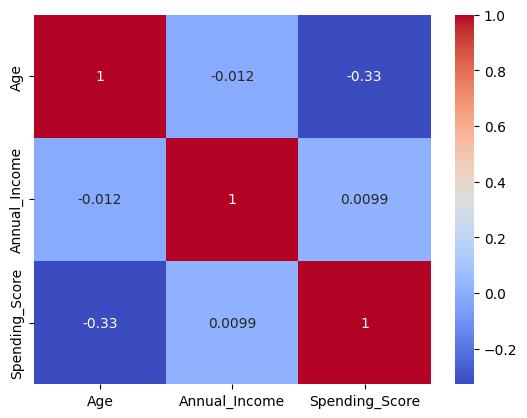

In [ ]:
# Tạo ma trận tương quan cho 3 cột "Age", "Annual Income (k$)", "Spending Score (1-100)"
corr_matrix = data[['Age', 'Annual_Income', 'Spending_Score']].corr()

# Vẽ heatmap cho ma trận tương quan
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
corr_matrix

,Age,Annual_Income,Spending_Score
Age,1.000000,-0.012398,-0.327227
Annual_Income,-0.012398,1.000000,0.009903
Spending_Score,-0.327227,0.009903,1.000000


In [ ]:
# Quy đổi Gender thành Gender_Male về dạng dữ liệu số
temp_data = pd.get_dummies(data, drop_first=True)

# Chuẩn hóa dữ liệu trong bộ dữ liệu sử dụng phương pháp StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(temp_data)

temp_data

,Age,Annual_Income,Spending_Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [ ]:
# Lấy ra một mảng numpy chứa dữ liệu của hai cột 'Annual Income (k$)' và 'Spending Score (1-100)'
# Từ tập dữ liệu gốc (data) và gán vào biến x để sử dụng cho việc phân nhóm dữ liệu bằng thuật toán Clustering.
x = data.iloc[:, [2, 3]].values

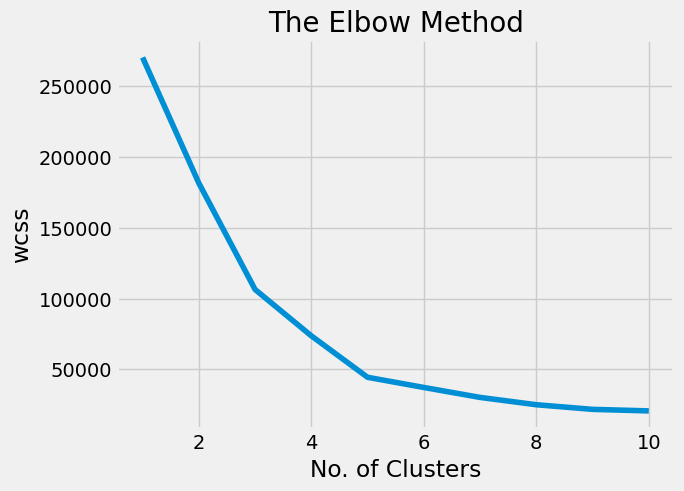

In [ ]:
# Tìm số cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

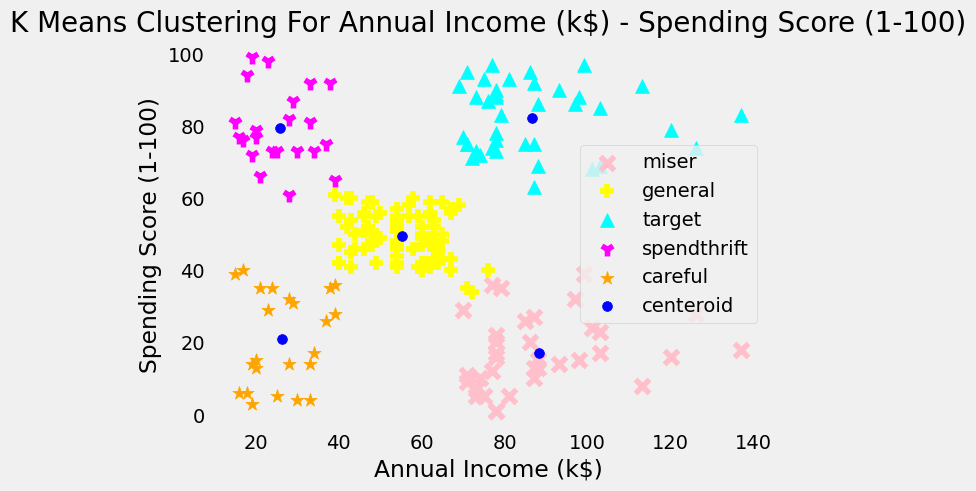

In [ ]:
# Phân cụm bằng thuật toán K-Means và trực quan hoá kết quả
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser', marker='x')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general', marker='+')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target', marker='^')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift', marker='1')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful', marker='*')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering For Annual Income (k$) - Spending Score (1-100)', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Silhouette
silhouette = silhouette_score(x, y_means)
print('Silhouette Score:', silhouette)

# Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(x, y_means)
print('Calinski-Harabasz Score:', calinski_harabasz)

# Davies-Bouldin
davies_bouldin = davies_bouldin_score(x, y_means)
print('Davies-Bouldin Score:', davies_bouldin)

Silhouette Score: 0.553931997444648
Calinski-Harabasz Score: 247.35899338037282
Davies-Bouldin Score: 0.5725628995597082


In [ ]:
# Lấy ra một mảng numpy chứa dữ liệu của hai cột: Age - Spending Score (1-100)
# Từ tập dữ liệu gốc (data) và gán vào biến x để sử dụng cho việc phân nhóm dữ liệu bằng thuật toán Clustering.
x = data.iloc[:, [1, 3]].values

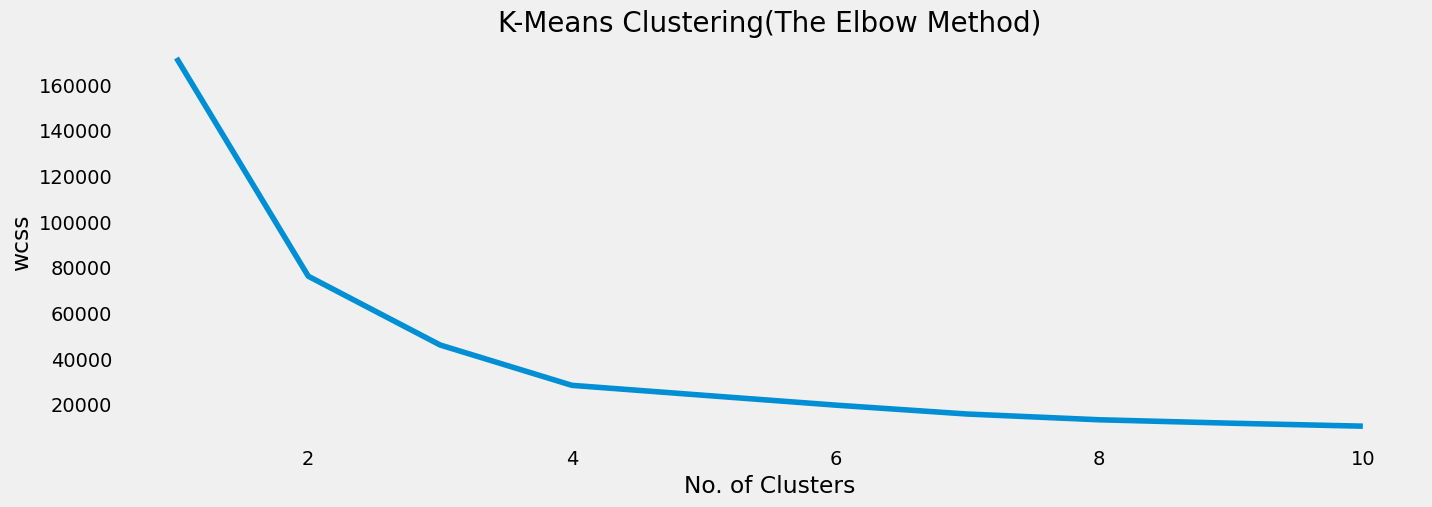

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

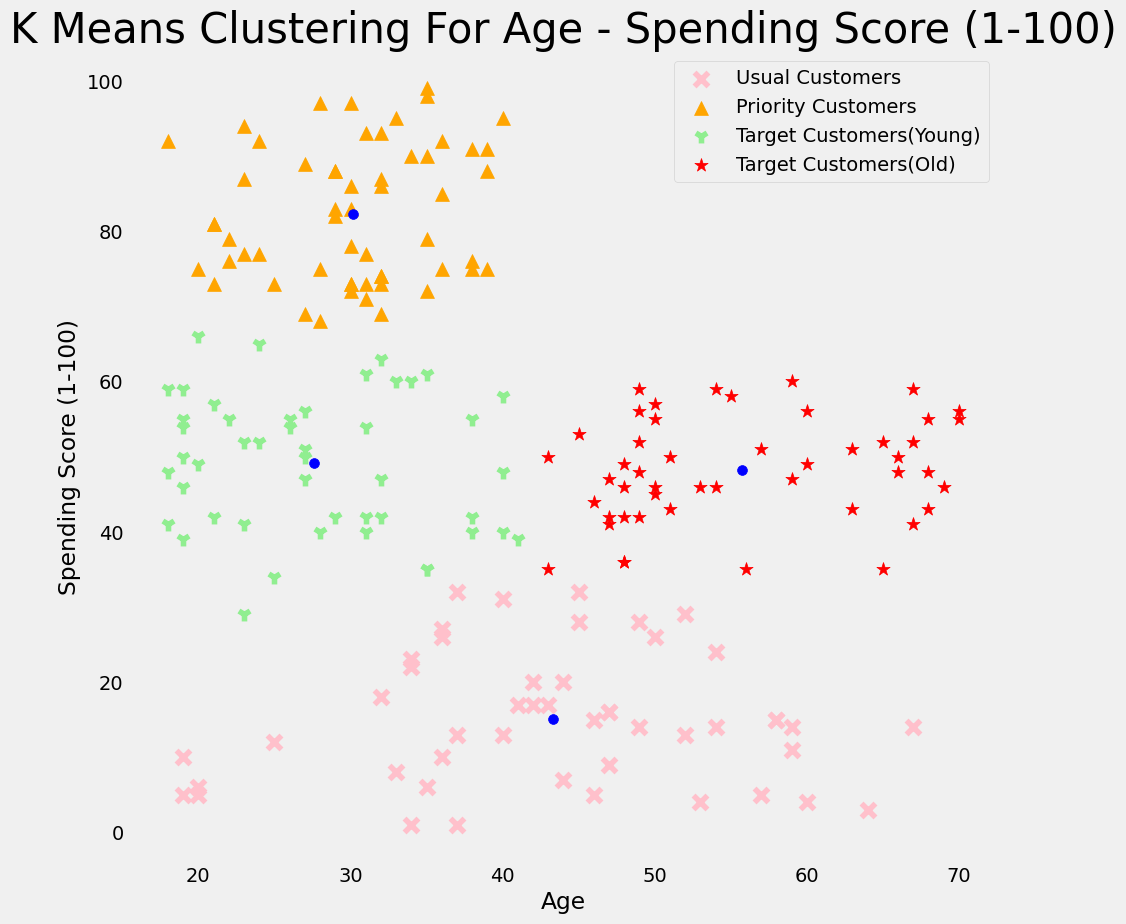

In [ ]:
# Phân cụm bằng thuật toán K-Means và trực quan hoá kết quả
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('K Means Clustering For Age - Spending Score (1-100)', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers', marker="x")
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers',marker="^")
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)',marker="1")
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)',marker="*")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Silhouette
silhouette = silhouette_score(x, ymeans)
print('Silhouette Score:', silhouette)

# Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(x, ymeans)
print('Calinski-Harabasz Score:', calinski_harabasz)

# Davies-Bouldin
davies_bouldin = davies_bouldin_score(x, ymeans)
print('Davies-Bouldin Score:', davies_bouldin)

Silhouette Score: 0.49973941540141753
Calinski-Harabasz Score: 332.5631268443306
Davies-Bouldin Score: 0.6869328339833636


In [ ]:
################################################### K-MEANS 3D ###################################################

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10

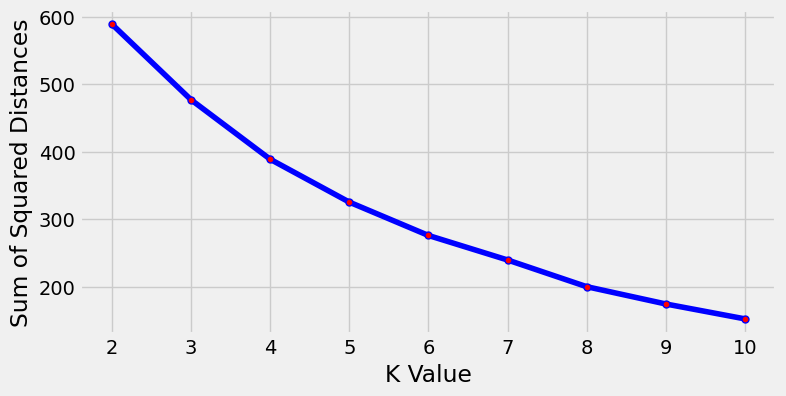

In [ ]:
# Vẽ biểu đồ elbow plot để tìm số cụm tối ưu
ssd = [] 
for k in range(2,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    ssd.append(model.inertia_)

plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,11), ssd, marker='o', color='blue', markerfacecolor='red', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

In [ ]:
# Gom nhóm dữ liệu trong bộ dữ liệu sử dụng mô hình KMeans
model = KMeans(n_clusters=5)
model.fit(scaled_data)

k_means_labels = model.fit_predict(temp_data)
k_means_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [ ]:
# Trực quan hoá kết quả gom nhóm dữ liệu 3 chiều bằng biểu đồ phân tán 3D
cluster_labels = model.fit_predict(temp_data)
temp_data['Cluster'] = cluster_labels

fig = px.scatter_3d(temp_data, x='Age', y='Annual_Income', z='Spending_Score', color='Cluster', opacity=0.75, symbol='Cluster')
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.update_layout(scene=dict(zaxis=dict(title='Spending Score (1-100)', tickvals=[0, 20, 40, 60, 80, 100]), yaxis=dict(title='Annual Income (k$)')))
fig.show(renderer="colab")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [ ]:
silhouette_score_value = silhouette_score(scaled_data, k_means_labels)
calinski_harabasz_score_value = calinski_harabasz_score(scaled_data, k_means_labels)
davies_bouldin_score_value = davies_bouldin_score(scaled_data, k_means_labels)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.22666336305101942
Calinski-Harabasz Score: 43.54709987749636
Davies-Bouldin Score: 1.6419055712448998


In [ ]:
################################################### Hierarchical 2D ###################################################

In [ ]:
# Lấy ra một mảng numpy chứa dữ liệu của hai cột Annual Income (k$) - Spending Score (1-100)
# Từ tập dữ liệu gốc (data) và gán vào biến x để sử dụng cho việc phân nhóm dữ liệu bằng thuật toán Clustering.
x = data.iloc[:, [2, 3]].values

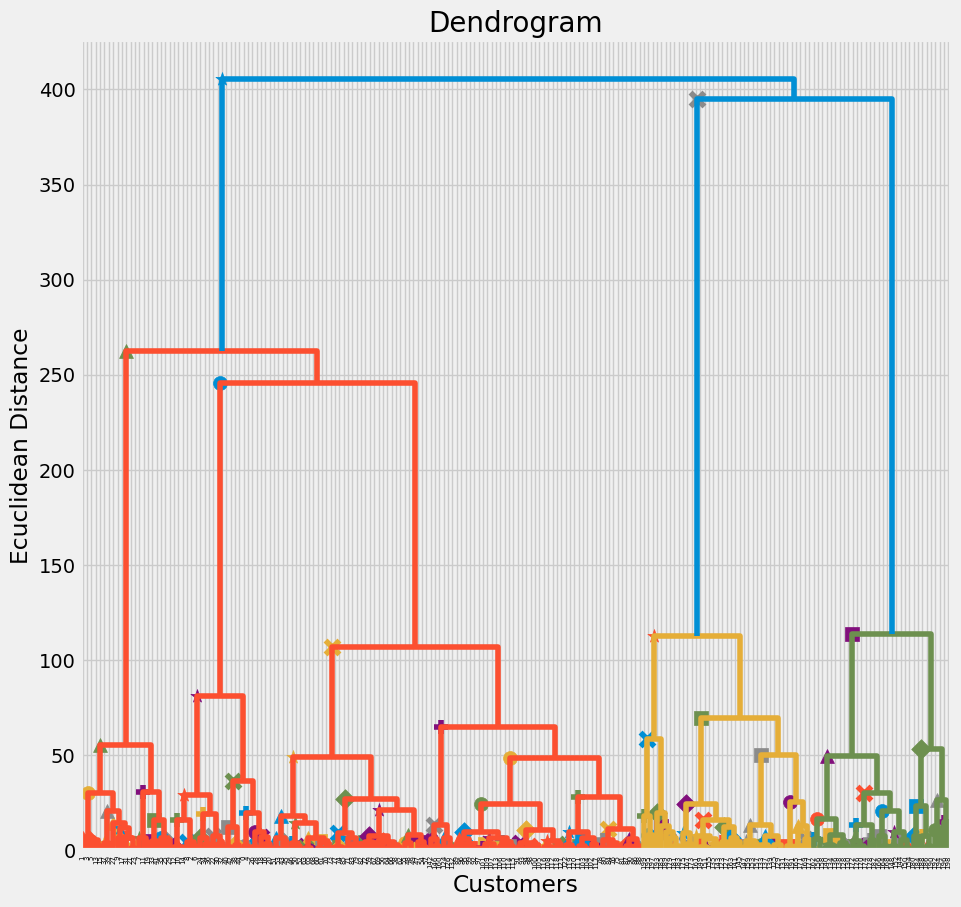

In [ ]:
# Vẽ sơ đồ dendrogram với phương pháp liên kết Ward
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

# Lấy tọa độ của các điểm trên dendrogram
icoord = np.array(dendrogram['icoord'])

# Lấy số thứ tự của các điểm trên dendrogram
leaves = np.array(dendrogram['leaves'])

# Lấy số lượng cụm
n_clusters = len(leaves)

# Tạo một danh sách các shapes khác nhau
shapes = ['o', '^', 's', '*', 'D', 'x', '+']

# Vẽ các shapes tương ứng với từng cụm
for i, cluster in enumerate(leaves):
    if cluster < len(icoord):  # Kiểm tra chỉ mục để đảm bảo rằng nó không vượt quá kích thước của mảng icoord
        shape = shapes[i % len(shapes)]  # Lặp lại các shapes nếu số lượng cụm lớn hơn số lượng shapes có sẵn
        plt.scatter(icoord[cluster, 1], dendrogram['dcoord'][cluster][1], s=100, marker=shape)

# Hiển thị sơ đồ dendrogram với các shapes tương ứng với từng cụm
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



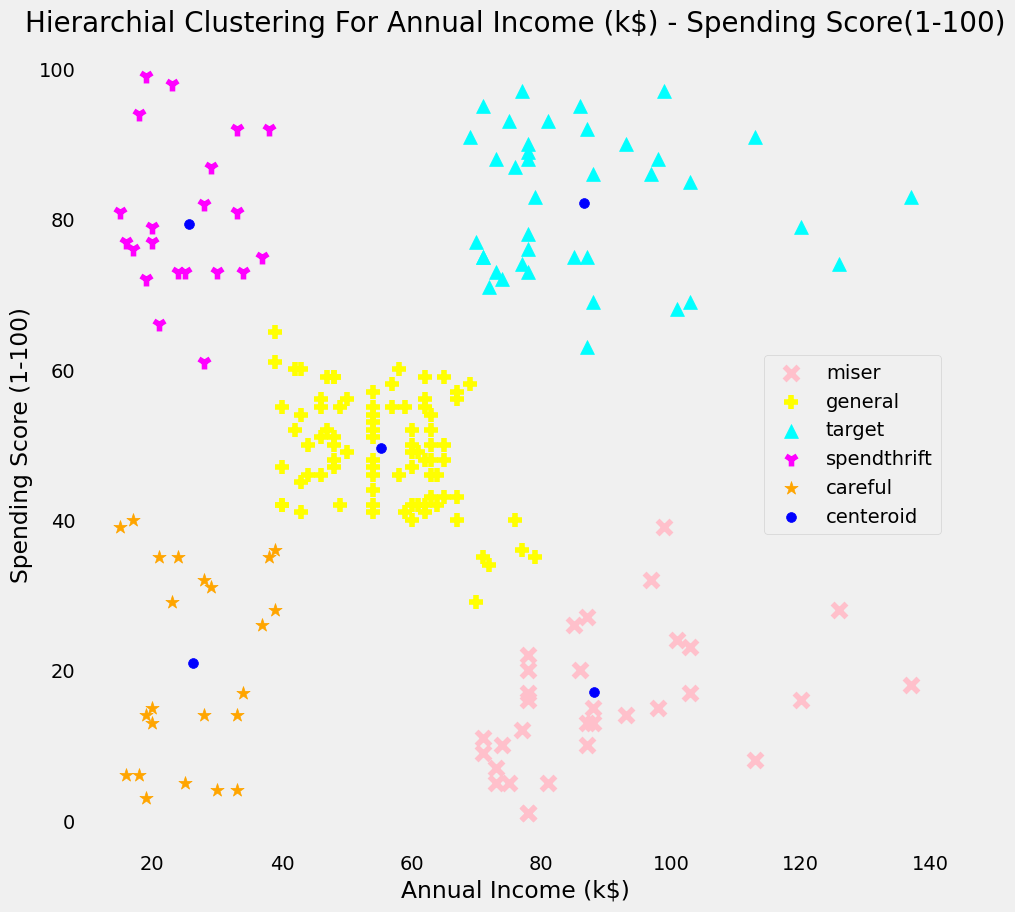

In [ ]:
# Trực quan hoá kết quả gom nhóm dữ liệu 2 chiều bằng biểu đồ phân tán 2D
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser', marker='x')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general', marker='+')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target', marker='^')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift', marker='1')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful', marker='*')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering For Annual Income (k$) - Spending Score(1-100)', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
silhouette_score_value = silhouette_score(x, y_hc)
calinski_harabasz_score_value = calinski_harabasz_score(x, y_hc)
davies_bouldin_score_value = davies_bouldin_score(x, y_hc)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.5529945955148897
Calinski-Harabasz Score: 243.07142892964563
Davies-Bouldin Score: 0.5782207452369454


In [ ]:
# Lấy ra một mảng numpy chứa dữ liệu của hai cột Age - Spending Score (1-100)
# Từ tập dữ liệu gốc (data) và gán vào biến x để sử dụng cho việc phân nhóm dữ liệu bằng thuật toán Clustering.
x = data.iloc[:, [1, 3]].values

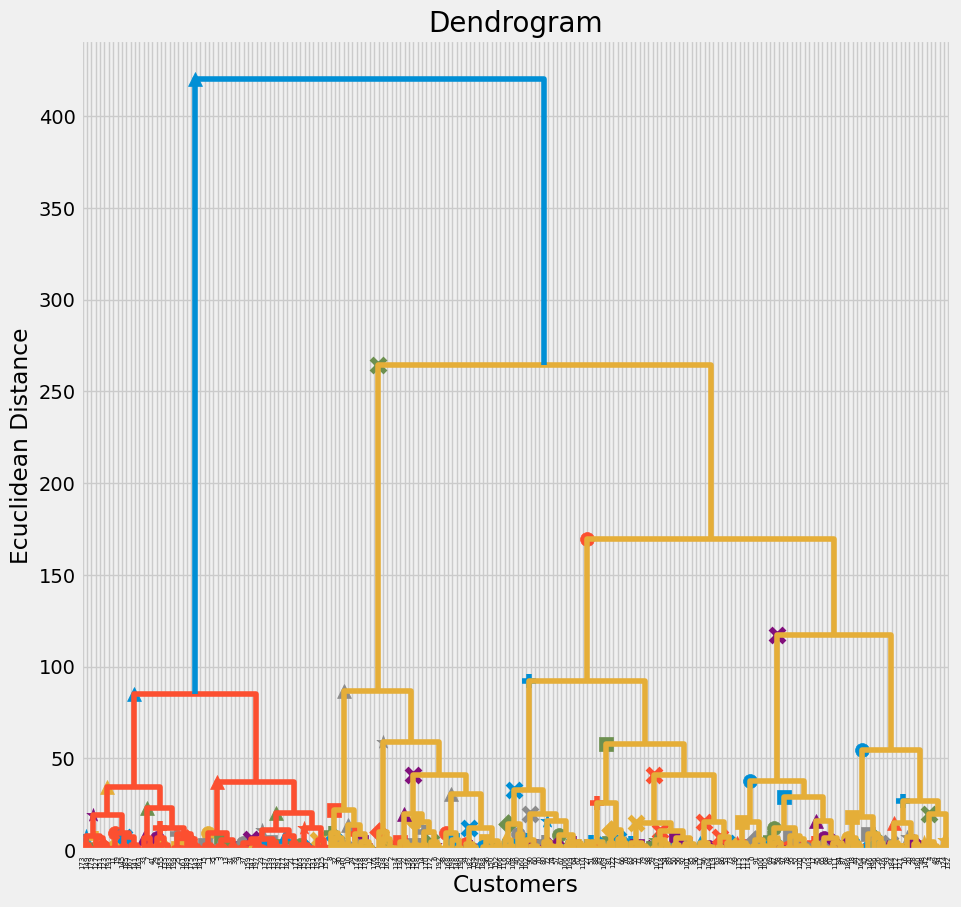

In [ ]:
# Vẽ sơ đồ dendrogram với phương pháp liên kết Ward
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))

# Lấy tọa độ của các điểm trên dendrogram
icoord = np.array(dendrogram['icoord'])

# Lấy số thứ tự của các điểm trên dendrogram
leaves = np.array(dendrogram['leaves'])

# Lấy số lượng cụm
n_clusters = len(leaves)

# Tạo một danh sách các shapes khác nhau
shapes = ['o', '^', 's', '*', 'D', 'x', '+']

# Vẽ các shapes tương ứng với từng cụm
for i, cluster in enumerate(leaves):
    if cluster < len(icoord):  # Kiểm tra chỉ mục để đảm bảo rằng nó không vượt quá kích thước của mảng icoord
        shape = shapes[i % len(shapes)]  # Lặp lại các shapes nếu số lượng cụm lớn hơn số lượng shapes có sẵn
        plt.scatter(icoord[cluster, 1], dendrogram['dcoord'][cluster][1], s=100, marker=shape)

# Hiển thị sơ đồ dendrogram với các shapes tương ứng với từng cụm
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



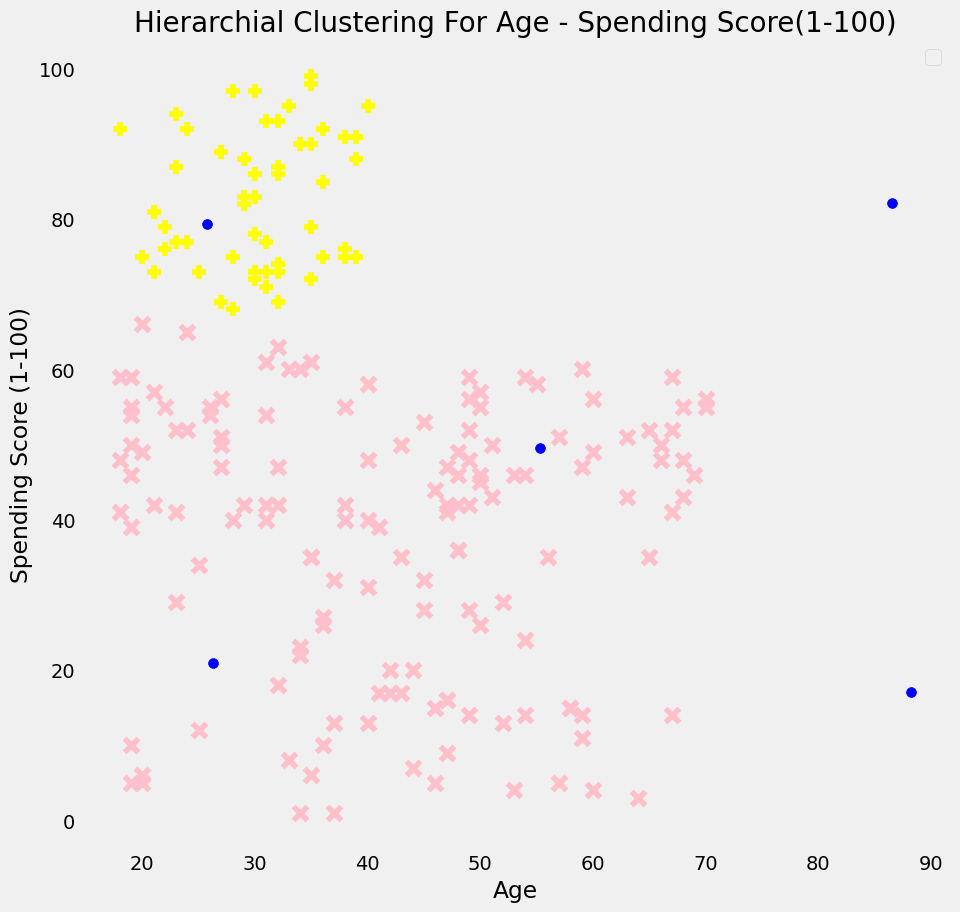

In [ ]:
# Trực quan hoá kết quả gom nhóm dữ liệu 2 chiều bằng biểu đồ phân tán 2D
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', marker='x')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', marker='+')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', marker='^')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', marker='1')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', marker='*')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering For Age - Spending Score(1-100)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
silhouette_score_value = silhouette_score(x, y_hc)
calinski_harabasz_score_value = calinski_harabasz_score(x, y_hc)
davies_bouldin_score_value = davies_bouldin_score(x, y_hc)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.40374071753059787
Calinski-Harabasz Score: 262.9303079394249
Davies-Bouldin Score: 0.828523468576287


In [ ]:
################################################### Hierarchical Clustering 3D ###################################################

In [ ]:
# Phân cụm dữ liệu bằng phương pháp liên kết gộp và trả về nhãn phân cụm với ngưỡng khoảng cách không xác định
model = AgglomerativeClustering(n_clusters=None,distance_threshold=0) 

cluster_labels = model.fit_predict(temp_data)
cluster_labels

array([195, 132, 103, 197, 189, 166, 117, 135, 153, 129, 199, 172, 177,
       188, 139, 159, 184, 147, 157, 181, 171, 140, 143, 104, 127, 111,
       156, 123, 108, 119, 116, 109, 121, 113, 175, 124, 173, 163, 191,
       165, 100, 112, 110, 174, 120, 183, 144, 131, 196, 155, 182, 176,
       142, 133,  82, 138, 178, 136, 125, 141,  91, 154, 170, 134, 169,
        99, 128, 185, 114, 107,  65, 187, 101,  61, 164,  88,  93, 126,
        56,  85, 115,  57, 137, 190,  87, 198,  81, 186, 179, 160,  77,
        69, 192, 130, 193,  43, 102, 167,  62,  79, 194,  94,  64,  76,
       149, 150,  97,  70, 148, 106, 180, 122,  89,  86,  96, 151,  54,
        92, 145, 118,  63,  74,  31, 162, 146,  59,  55, 161,  58,  98,
       168,  27,  28,  46, 152,  72,  34,  50,  73,  40,  75,  71,  80,
        83,  49,  66,  53,  95,  84,  13,  90,  44,  35,  60, 158,  36,
        45,  37,  29,  67,  39,  51,  47,  42,  30,  21,  48,  19,  22,
        41,  78,  68,  33,  16, 105,  26,  17,  32,  20,  15,  5

In [ ]:
# Tạo ma trận liên kết (linkage matrix) bằng phương pháp liên kết gộp (agglomerative linkage) và hiển thị 5 hàng đầu tiên của ma trận.
linkage_matrix = hierarchy.linkage(model.children_)
linkage_matrix[:][:5]

array([[ 76.        , 113.        ,   1.41421356,   2.        ],
       [ 43.        ,  88.        ,   1.41421356,   2.        ],
       [  9.        ,  47.        ,   1.41421356,   2.        ],
       [ 49.        ,  91.        ,   1.41421356,   2.        ],
       [ 24.        ,  93.        ,   1.41421356,   2.        ]])

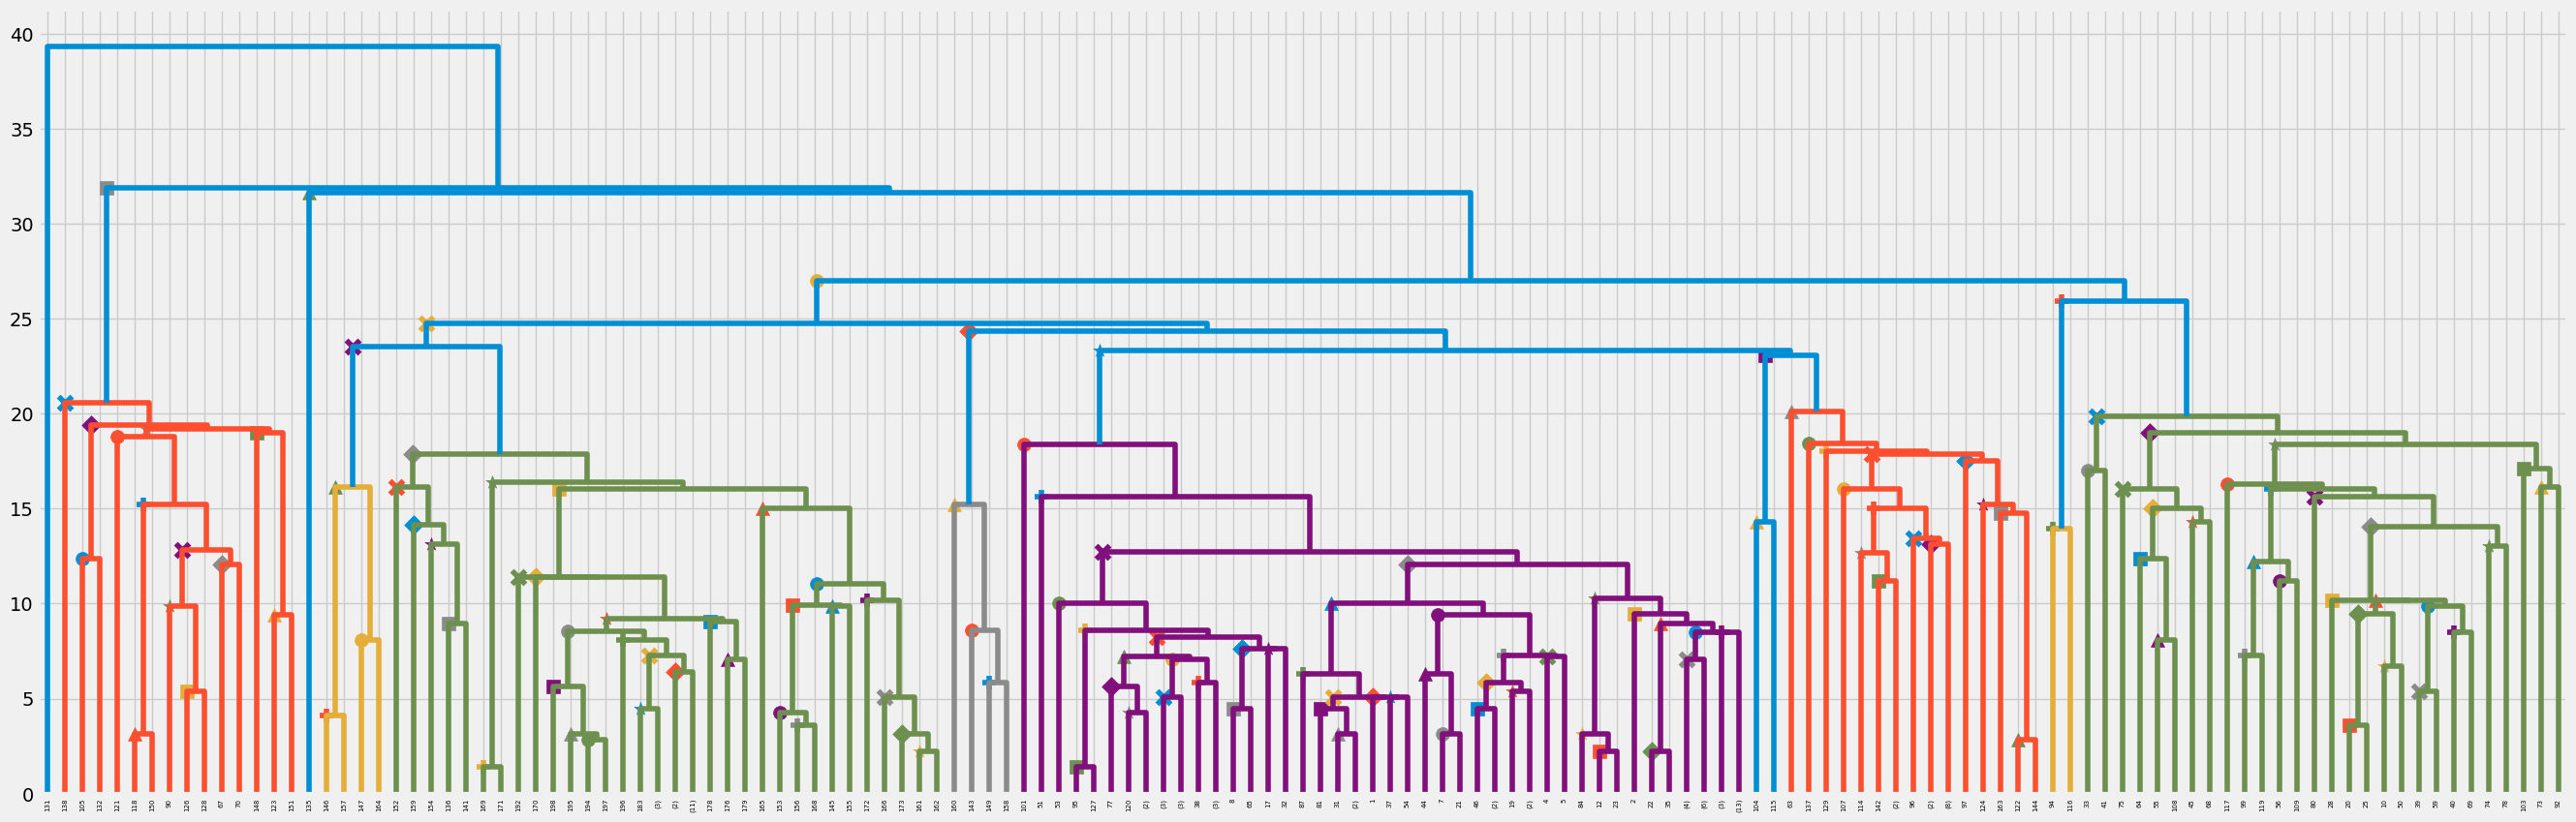

In [ ]:
# Vẽ dendrogram với ma trận liên kết
plt.figure(figsize=(30,10))
dn = hierarchy.dendrogram(linkage_matrix, truncate_mode='level', p=15, color_threshold=23) 

# Lấy tọa độ của các điểm trên dendrogram
coords = np.array(dn['icoord'])

# Lấy số thứ tự của các cụm
clusters = np.array(dn['leaves'])

# Tạo một danh sách các shapes khác nhau
shapes = ['o', '^', 's', '*', 'D', 'x', '+']

# Vẽ các shapes tương ứng với từng cụm
for i in range(len(dn['dcoord'])-1):
    shape = shapes[i % len(shapes)]  # Lặp lại các shapes nếu số lượng cụm lớn hơn số lượng shapes có sẵn
    plt.scatter(coords[i, 1], dn['dcoord'][i][1], s=100, marker=shape)

plt.show()

In [ ]:
# Áp dụng Agglomerative Clustering để phân cụm dữ liệu và gán nhãn cho từng điểm dữ liệu
model = AgglomerativeClustering(n_clusters=5)

cluster_labels = model.fit_predict(temp_data) 
temp_data['Cluster'] = cluster_labels
cluster_labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [ ]:
# Trực quan hoá kết quả gom nhóm dữ liệu 3 chiều bằng biểu đồ phân tán 3D
fig = px.scatter_3d(temp_data, x='Age', y='Annual_Income', z='Spending_Score', color="Cluster", symbol="Cluster", opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.show()

In [ ]:
silhouette_score_value = silhouette_score(temp_data, cluster_labels)
calinski_harabasz_score_value = calinski_harabasz_score(temp_data, cluster_labels)
davies_bouldin_score_value = davies_bouldin_score(temp_data, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.44127606330887553
Calinski-Harabasz Score: 147.8262776230432
Davies-Bouldin Score: 0.8198131602158562


In [ ]:
################################################### DBSCAN 2D ###################################################

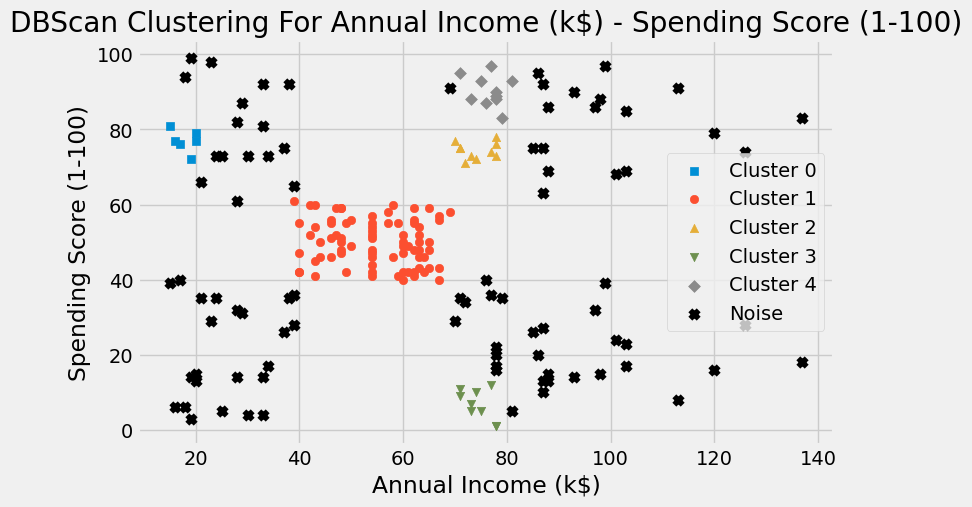

In [ ]:
# Chuẩn bị dữ liệu
X = temp_data[['Annual_Income', 'Spending_Score']]

# Khởi tạo và huấn luyện mô hình DBScan
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(X)

# Gán nhãn cho các cụm dữ liệu
labels = dbscan.labels_

# Trực quan hoá kết quả
plt.figure(figsize=(8, 5))
markers = ['s', 'o', '^', 'v', 'D', 'X', '*', 'P', 'H'] # Các marker khác nhau

for label, marker in zip(set(labels), markers):
    if label == -1: # Nếu nhãn là điểm nhiễu
        plt.scatter(X[labels==-1]['Annual_Income'], X[labels==-1]['Spending_Score'], 
                    c='k', marker='x', label='Noise')
    else: # Nếu nhãn là một cụm
        plt.scatter(X[labels==label]['Annual_Income'], X[labels==label]['Spending_Score'], 
                    marker=marker, label='Cluster {}'.format(label))
        
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBScan Clustering For Annual Income (k$) - Spending Score (1-100)')
plt.legend()
plt.show()

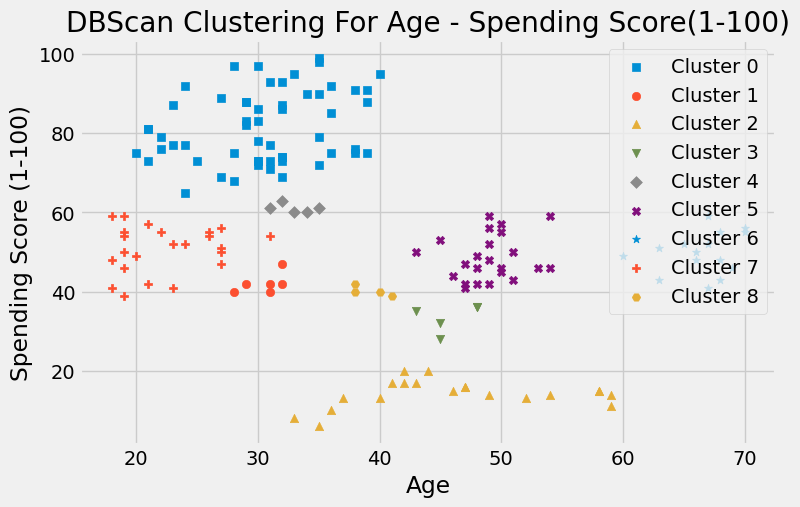

In [ ]:
# Chuẩn bị dữ liệu
X = temp_data[['Age', 'Spending_Score']]

# Khởi tạo và huấn luyện mô hình DBScan
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan.fit(X)

# Gán nhãn cho các cụm dữ liệu
labels = dbscan.labels_

# Trực quan hoá kết quả
plt.figure(figsize=(8, 5))
markers = ['s', 'o', '^', 'v', 'D', 'X', '*', 'P', 'H'] # Các marker khác nhau

for label, marker in zip(set(labels), markers):
    if label == -1: # Nếu nhãn là điểm nhiễu
        plt.scatter(X[labels==-1]['Age'], X[labels==-1]['Spending_Score'], 
                    c='k', marker='x', label='Noise')
    else: # Nếu nhãn là một cụm
        plt.scatter(X[labels==label]['Age'], X[labels==label]['Spending_Score'], 
                    marker=marker, label='Cluster {}'.format(label))
        
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('DBScan Clustering For Age - Spending Score(1-100)')

plt.legend()
plt.show()

In [ ]:
################################################### DBSCAN 3D ###################################################

In [ ]:
# Tính toán tỷ lệ phần trăm điểm ngoại lai cho các giá trị epsilon khác nhau 
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): 
    dbscan = DBSCAN(eps=eps,min_samples=8)
    dbscan.fit(scaled_data)
   
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

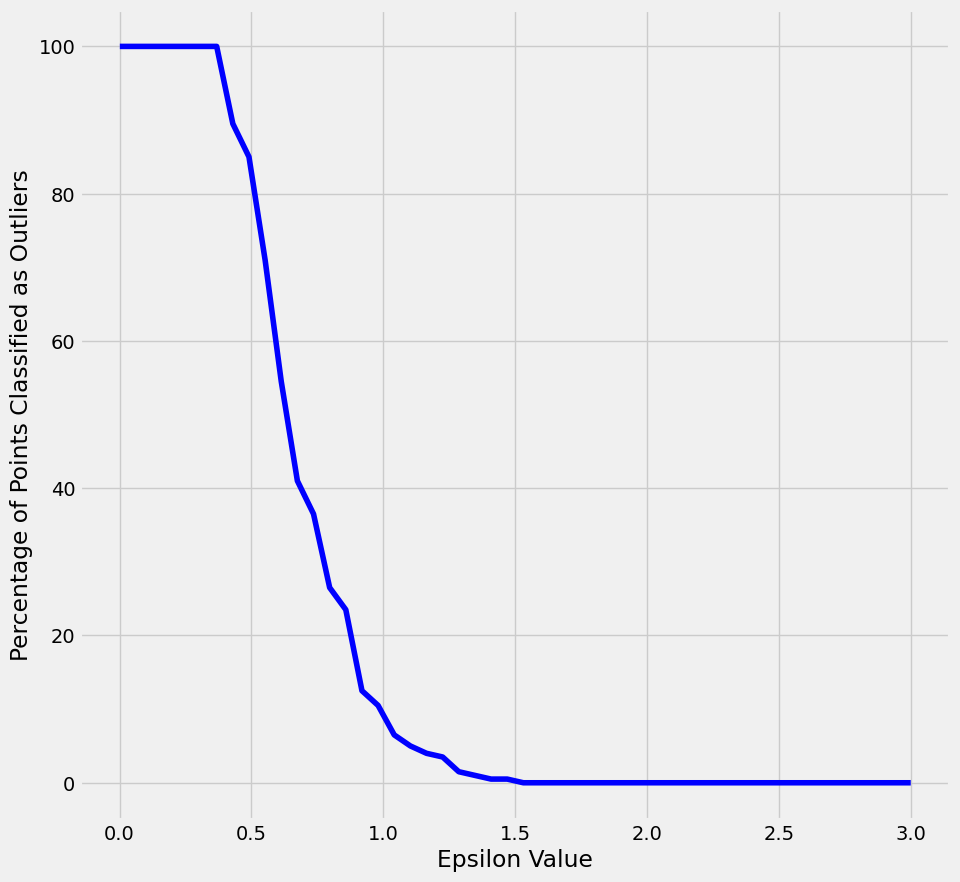

In [ ]:
# Vẽ Biểu đồ đường thể hiện tỷ lệ phần trăm điểm ngoại lai cho các giá trị epsilon khác nhau
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='blue')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [ ]:
# Phân cụm dữ liệu bằng thuật toán DBSCAN với giá trị epsilon và số mẫu nhỏ nhất được chỉ định
dbscan = DBSCAN(eps=1.2,min_samples=8)
dbscan.fit(scaled_data)

DBSCAN(eps=1.2, min_samples=8)

In [ ]:
# Lấy các nhãn của các cụm dữ liệu được phân loại
temp_data['Cluster'] = dbscan.labels_
dbscan.labels_

array([ 0,  0,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  0,  1,
        0,  0,  1,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        0,  1,  0,  1,  1,  1,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  1,
        1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,  1,  0,
        0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  1,  1,  0,  1,
        0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0, -1, -1])

In [ ]:
#	Trực quan hoá kết quả gom nhóm dữ liệu 3 chiều bằng biểu đồ phân tán 3D
fig = px.scatter_3d(temp_data, x='Age', y='Annual_Income', z='Spending_Score', color="Cluster", symbol="Cluster", opacity=0.75)
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, x=0, ticks="outside"))
fig.show()

In [ ]:
silhouette_score_value = silhouette_score(scaled_data, cluster_labels)
calinski_harabasz_score_value = calinski_harabasz_score(scaled_data, cluster_labels)
davies_bouldin_score_value = davies_bouldin_score(scaled_data, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Calinski-Harabasz Score:", calinski_harabasz_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

Silhouette Score: 0.22577561094422557
Calinski-Harabasz Score: 43.09075929829435
Davies-Bouldin Score: 1.6272126706267347
